In [2]:
from astropy.io import fits

phofile = fits.open('/Users/zouxd/Documents/2-Projects/2024-Japan-OSIRIS-Hayabusa2/Regional photometry/li/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg.fits')
phofile.info()
phofile[1].data.dtype.names


Filename: /Users/zouxd/Documents/2-Projects/2024-Japan-OSIRIS-Hayabusa2/Regional photometry/li/phogrid_PS-DS_noBBD2-noRecon_segreject_5deg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1  INFO          1 BinTableHDU     47   2592R x 14C   [15A, D, D, D, D, D, D, D, D, D, D, D, L, L]   
  2  LON           1 ImageHDU         8   (73,)   float64   
  3  LAT           1 ImageHDU         8   (37,)   float64   


('file',
 'lonmin',
 'lonmax',
 'latmin',
 'latmax',
 'count',
 'incmin',
 'incmax',
 'emimin',
 'emimax',
 'phamin',
 'phamax',
 'masked',
 'loaded')

In [3]:
print(phofile[2].data)


[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355. 360.]


In [4]:
print(phofile[1].data)

[('phgrd_0000.fits', 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  1,  0)
 ('phgrd_0001.fits', 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  1,  0)
 ('phgrd_0002.fits', 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  1,  0)
 ...
 ('phgrd_2589.fits', 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  1,  0)
 ('phgrd_2590.fits', 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  1,  0)
 ('phgrd_2591.fits', 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,  1,  0)]


In [5]:
print(phofile[0].header)


SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  VERSION = '1.0.0   '                                                            END                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [10]:
corrfile = fits.open('/Volumes/BLUE/2024-Japan-OSIRIS-Hayabusa2/Resolved_Regional_OVIRS/Modeling/20200428/Data/PS-DS_noBBD2-noRecon_segreject_phocorr.fits')
corrfile.info()
corrfile[1].data.dtype.names
corrfile[4].data.dtype.names

Filename: /Volumes/BLUE/2024-Japan-OSIRIS-Hayabusa2/Resolved_Regional_OVIRS/Modeling/20200428/Data/PS-DS_noBBD2-noRecon_segreject_phocorr.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       9   (1393, 81791)   float32   
  1  UNCERTAINTIES    1 ImageHDU         8   (1393, 81791)   float32   
  2  WAVELENGTH    1 ImageHDU         7   (1393,)   float32   
  3  F_PHOCORR     1 ImageHDU         8   (1393, 81791)   float32   
  4                1 BinTableHDU     68   81791R x 30C   [20A, B, B, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 32A, 40A, 24A, 24A, D, D, D, 64A]   


('SCLK',
 'bs_flag',
 'fov_flag',
 'bs_angle',
 'lat',
 'lon',
 'range',
 'bs_x',
 'bs_y',
 'bs_z',
 'incidang',
 'emissang',
 'phaseang',
 'fill_fac',
 'smjax',
 'smnax',
 'sun_rng',
 'targrng',
 'BORE_RA',
 'BORE_DEC',
 'BENNURA',
 'BENNUDEC',
 'BENNURDT',
 'BENNURDQ',
 'DATE_OBS',
 'MIDOBS',
 'EXPTIME',
 'EXPOSEC',
 'ET',
 'META_KER')

In [ ]:
# 定义元数据列和光谱列
metadata_columns = [
    "Filename", "DATE_OBS", "MID_SCLK", "LAT", "LON", "RANGE", 
    "BS_X", "BS_Y", "BS_Z", "INCIDANG", "EMISSANG", "PHASEANG", 
    "FILL_FAC", "SMJAX", "SMNAX", "SUN_RNG", "TARGRNG", "BORE_RA", "BORE_DEC"
]
num_wavelengths = 1393
spectral_columns = [f"Wavelength_{i+1}" for i in range(num_wavelengths)]

# 用于存储元数据和光谱数据的表
metadata_table = []
spectral_data = np.zeros((num_wavelengths, 0), dtype=np.float32)  # 设置浮点数数据类型


In [8]:
corrfile2 = fits.open('/Users/zouxd/Documents/2-Projects/2024-Japan-OSIRIS-Hayabusa2/Data/old_idl_processing/7-All_combined_new_cal_noPS_noBBD2_v03_corr300030_radf.fits')
corrfile2.info()
corrfile2[1].data.dtype.names

Filename: /Users/zouxd/Documents/2-Projects/2024-Japan-OSIRIS-Hayabusa2/Data/old_idl_processing/7-All_combined_new_cal_noPS_noBBD2_v03_corr300030_radf.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   (1393, 70342)   float32   
  1  UNCERTAINTIES    1 ImageHDU         8   (1393, 70342)   float32   
  2  WAVELENGTHS    1 ImageHDU         7   (1393,)   float32   
  3  METADATA      1 BinTableHDU     98   70342R x 30C   [18A, B, B, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 5A, 10A, 23A, 23A, D, D, D, 39A]   


In [9]:
corrfile2[3].data.dtype.names

('SCLK',
 'BS_FLAG',
 'FOV_FLAG',
 'BS_ANGLE',
 'LAT',
 'LON',
 'RANGE',
 'BS_X',
 'BS_Y',
 'BS_Z',
 'INCIDANG',
 'EMISSANG',
 'PHASEANG',
 'FILL_FAC',
 'SMJAX',
 'SMNAX',
 'SUN_RNG',
 'TARGRNG',
 'BORE_RA',
 'BORE_DEC',
 'BENNURA',
 'BENNUDEC',
 'BENNURDT',
 'BENNURDQ',
 'DATE_OBS',
 'MIDOBS',
 'EXPTIME',
 'EXPOSEC',
 'ET',
 'META_KER')

In [ ]:
#Comparing corrfile and corrfile2


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
def plot_spectra(metadata_table, spectral_data, date=None, sclk=None, lat=None, lon=None):
    """
    Extracts and plots spectral data based on specified metadata criteria.
    
    Parameters:
    - metadata_table: DataFrame containing metadata
    - spectral_data: 2D array with spectral data where rows are bands and columns are samples
    - date: tuple(int, int) or int, optional - (min_date, max_date) range or specific date to filter
    - sclk: tuple(float, float) or float, optional - (min_sclk, max_sclk) range or specific SCLK to filter
    - lat: tuple(float, float) or float, optional - (min_lat, max_lat) range or specific latitude to filter
    - lon: tuple(float, float) or float, optional - (min_lon, max_lon) range or specific longitude to filter
    """

    ### Filter begin ###########################
    #max_range = None, 
    #specific_date = None, 
    #exclude_dates = None
    #max_range = 50, 
    exclude_dates = [20170922, 20170925, 20190314]
    
    # # Apply max_range filter if specified
    # if max_range is not None:
    #     metadata_table = metadata_table[metadata_table['TARGRNG'] < max_range]    
    # # Apply specific_date filter if specified
    # if specific_date is not None:
    #     metadata_table = metadata_table[metadata_table['date'] == specific_date] 
    # Exclude specified dates if provided
    if exclude_dates is not None:
        metadata_table = metadata_table[~metadata_table['date'].isin(exclude_dates)]
    # # Get the indices of the filtered metadata_table to apply to spectral_data
    # ind = metadata_table.index
    # spectral_band_filtered = spectral_data[:, ind]  # Extract matching indices
    ### Filter end #############################  
    
    # Convert 'date' column to integer if needed
    if metadata_table['date'].dtype == 'object':
        metadata_table['date'] = metadata_table['date'].astype(int)
    
    # Apply filters based on provided criteria
    df = metadata_table
    
    # Date filter
    if date is not None:
        if isinstance(date, tuple):
            df = df[(df['date'] >= date[0]) & (df['date'] <= date[1])]
        else:
            df = df[df['date'] == date]
    
    # SCLK filter
    if sclk is not None:
        if isinstance(sclk, tuple):
            df = df[(df['sclk'] >= sclk[0]) & (df['sclk'] <= sclk[1])]
        else:
            df = df[df['sclk'] == sclk]
    
    # Latitude filter
    if lat is not None:
        if isinstance(lat, tuple):
            df = df[(df['LAT'] >= lat[0]) & (df['LAT'] <= lat[1])]
        else:
            df = df[np.isclose(df['LAT'], lat)]
    
    # Longitude filter
    if lon is not None:
        if isinstance(lon, tuple):
            df = df[(df['LON'] >= lon[0]) & (df['LON'] <= lon[1])]
        else:
            df = df[np.isclose(df['LON'], lon)]
    
    # Check if any rows match the filters
    if df.empty:
        print("No data found for the specified criteria.")
        return
    
    # Get indices of the filtered rows to match with spectral_data
    indices = df.index
    
    # Extract and plot each matching spectrum
    plt.figure(figsize=(15, 6))

    for idx in indices:
        print(df.at[idx,'date'])
        spectrum = spectral_data[:, idx]/spectral_data[79, idx]  # Extract the full spectrum for this index
        lat_value = round(df.at[idx, 'LAT'],2)
        lon_value = round(df.at[idx, 'LON'],2)
        range_value = round(df.at[idx, 'TARGRNG'], 2)
        if range_value < 2:
            c = "yellow"
        elif range_value < 8:
            c = "orange"
        elif range_value < 100:
            c = "red"
        plt.plot(wav, spectrum, color = c, label=f"Lat {lat_value}, Lon {lon_value}, Range {range_value} km")

    plt.xlabel("Wavelenghth")
    plt.ylabel("reflectence nomalized at 550nm")
    plt.title("Spectra")
    plt.ylim(0.6, 1.3)  # Set y-axis limit
    plt.legend(loc='best', fontsize='small')  # Use a small font for multiple labels
    plt.grid(True)
    plt.show()

# Usage example with ranges
#plot_spectra(metadata_table, spectral_data, date=(20190301, 20190310), lat=(30.0, 35.0), lon=(139.0, 140.0))



indices =  [44035, 18002, 39403]
Spectrum 1 DATE_OBS: 2019-05-09T20:33:20.782
Spectrum 2 DATE_OBS: 2019-03-21T18:24:24.917
Spectrum 3 DATE_OBS: 2019-05-03T08:51:24.315
Spectrum 1 DATE_OBS: 2019-05-09T20:33:20.782
Spectrum 2 DATE_OBS: 2019-03-21T18:24:24.917
Spectrum 3 DATE_OBS: 2019-05-03T08:51:24.315


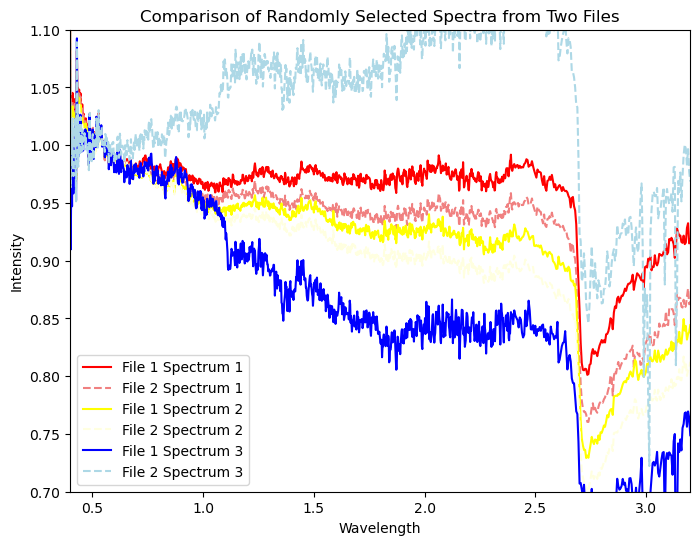

In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import random

# Step 1: Load FITS files
file1 = '/Users/zouxd/Documents/2-Projects/2024-Japan-OSIRIS-Hayabusa2/Data/old_idl_processing/7-All_combined_new_cal_noPS_noBBD2_v03_corr300030_radf.fits'
file2 = '/Volumes/BLUE/2024-Japan-OSIRIS-Hayabusa2/Resolved_Regional_OVIRS/Modeling/20200428/Data/PS-DS_noBBD2-noRecon_segreject_phocorr.fits'

# Open FITS files
hdulist1 = fits.open(file1)
hdulist2 = fits.open(file2)

# Step 2: Access spectra and metadata
spectra1 = hdulist1[0].data  # Shape (1393, 70342)
metadata1 = hdulist1[3].data  # Metadata table
spectra2 = hdulist2[0].data  # Shape (1393, 81791)
metadata2 = hdulist2[4].data  # Metadata table

# Step 3: Randomly select 3 indices from the first file
indices = random.sample(range(spectra1.shape[0]), 3)
print('indices = ',indices)
# Retrieve SCLK values for these indices
sclk_values = [metadata1['SCLK'][i] for i in indices]
date_obs_values = [metadata1['DATE_OBS'][i] for i in indices]

# Print DATE_OBS values
for i, date_obs in enumerate(date_obs_values):
    print(f"Spectrum {i+1} DATE_OBS:", date_obs)

    
# Step 4: Find matching spectra in the second file based on SCLK
matching_indices = [np.where(metadata2['SCLK'] == sclk)[0][0] for sclk in sclk_values]
date_obs_values2 = [metadata2['DATE_OBS'][i] for i in matching_indices]
# Print DATE_OBS values
for i, date_obs in enumerate(date_obs_values2):
    print(f"Spectrum {i+1} DATE_OBS:", date_obs)
    
# Step 5: Plot spectra
colors = ['red', 'yellow', 'blue']  # Colors for file 1
light_colors = ['lightcoral', 'lightyellow', 'lightblue']  # Colors for file 2

plt.figure(figsize=(8, 6))
wavelengths = hdulist1[2].data  # Wavelength data (shape should be (1393,))

for i, (idx1, idx2) in enumerate(zip(indices, matching_indices)):
    plt.plot(wavelengths, spectra1[idx1, :]/spectra1[idx1, 79], color=colors[i], label=f'File 1 Spectrum {i+1}')
    plt.plot(wavelengths, spectra2[idx2,:]/spectra2[idx2,79], color=light_colors[i], linestyle='--', label=f'File 2 Spectrum {i+1}')

plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.xlim(0.4, 3.2)
#plt.ylim(0.013, 0.026)  
plt.ylim(0.7, 1.1)# Set y-axis limit
plt.legend()
plt.title('Comparison of Randomly Selected Spectra from Two Files')
plt.show()

# Close FITS files
hdulist1.close()
hdulist2.close()


In [43]:
print("Dimensions of spectra1:", spectra1.shape)

Dimensions of spectra1: (70342, 1393)
